<h1><center>EDA on IPL data</center></h1>
<img src="https://i.pinimg.com/originals/a2/20/30/a220301dbfa84edd4ffc6ce9bb528841.png" >

This notebook analyzes the given datasets (matches.csv and deliveries.csv) of the Indian Premier League. Explored the data and ploted charts to understand and find insights on the data

### Importing the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = 50

In [2]:
#sns.set(color_codes=True)
sns.set_palette(sns.color_palette('muted'))

**Importing the matches data set**

In [3]:
match = pd.read_csv('matches.csv', index_col='id')
match.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
match.shape

(696, 17)

In [5]:
match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 1 to 7953
Data columns (total 17 columns):
season             696 non-null int64
city               689 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
dtypes: int64(4), object(13)
memory usage: 97.9+ KB


In [6]:
match.describe(include='all')

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,696.000000,689,696,696,696,696,696,696,696.000000,693,696.000000,696.000000,693,696,695,695,60
unique,NaN,32,498,14,14,14,2,3,NaN,14,NaN,NaN,214,35,55,58,18
top,NaN,Mumbai,2013-04-06,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,M Chinnaswamy Stadium,HDPK Dharmasena,S Ravi,C Shamshuddin
freq,NaN,94,2,91,90,90,413,686,NaN,98,NaN,NaN,20,73,73,56,6
mean,2012.965517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027299,NaN,13.472701,3.349138,NaN,NaN,NaN,NaN,NaN
std,3.069266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.163070,NaN,23.607994,3.411398,NaN,NaN,NaN,NaN,NaN
min,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,3.000000,NaN,NaN,NaN,NaN,NaN
75%,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


Since we have some missing cities, winner and player of match data, going to fill with default values

In [7]:
match.city.fillna('unknown', inplace=True)
match.winner.fillna('draw', inplace=True)
match.player_of_match.fillna('draw', inplace=True)

Converting the date from object datatype to datetime datatype

In [8]:
match['date'] = pd.to_datetime(match['date'])

**List of unique team names and count**

In [9]:
print(match.team1.unique())
print(match.team2.unique())
print(match.winner.unique())

['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants']
['Royal Challengers Bangalore' 'Rising Pune Supergiant'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Delhi Daredevils'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions' 'Rajasthan Royals'
 'Chennai Super Kings' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'Rising Pune Supergiants']
['Sunrisers Hyderabad' 'Rising Pune Supergiant' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Delhi Daredevils' 'Gujarat Lions' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'draw' 'Rising Pune Supergiants']


Since we have a duplicate of team name for **Rising Pune Supergiant** as **Rising Pune Supergiants**, we need to replace the duplicate value

In [10]:
match.loc[match['team1'] == 'Rising Pune Supergiants', 'team1'] = 'Rising Pune Supergiant'
match.loc[match['team2'] == 'Rising Pune Supergiants', 'team2'] = 'Rising Pune Supergiant'
match.loc[match['winner'] == 'Rising Pune Supergiants', 'winner'] = 'Rising Pune Supergiant'
match.loc[match['toss_winner'] == 'Rising Pune Supergiants', 'toss_winner'] = 'Rising Pune Supergiant'

**Importing deliveries data set** 

In [11]:
delivery = pd.read_csv('deliveries.csv')
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [12]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164750 entries, 0 to 164749
Data columns (total 21 columns):
match_id            164750 non-null int64
inning              164750 non-null int64
batting_team        164750 non-null object
bowling_team        164750 non-null object
over                164750 non-null int64
ball                164750 non-null int64
batsman             164750 non-null object
non_striker         164750 non-null object
bowler              164750 non-null object
is_super_over       164750 non-null int64
wide_runs           164750 non-null int64
bye_runs            164750 non-null int64
legbye_runs         164750 non-null int64
noball_runs         164750 non-null int64
penalty_runs        164750 non-null int64
batsman_runs        164750 non-null int64
extra_runs          164750 non-null int64
total_runs          164750 non-null int64
player_dismissed    8157 non-null object
dismissal_kind      8157 non-null object
fielder             5918 non-null object
dtype

In [13]:
delivery.describe(include='all')

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
count,164750.000000,164750.000000,164750,164750,164750.000000,164750.000000,164750,164750,164750,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,8157,8157,5918
unique,NaN,NaN,14,14,NaN,NaN,488,484,378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464,9,476
top,NaN,NaN,Mumbai Indians,Mumbai Indians,NaN,NaN,V Kohli,SK Raina,Harbhajan Singh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SK Raina,caught,KD Karthik
freq,NaN,NaN,20673,20573,NaN,NaN,3879,3832,3182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146,4861,145
mean,977.951757,1.482307,NaN,NaN,10.151879,3.616243,NaN,NaN,NaN,0.000492,0.037184,0.004898,0.021548,0.004200,0.000061,1.237238,0.067891,1.305129,NaN,NaN,NaN
std,2147.671843,0.501592,NaN,NaN,5.675666,1.807398,NaN,NaN,NaN,0.022168,0.254087,0.115006,0.196410,0.071111,0.017421,1.603511,0.345144,1.596255,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,175.000000,1.000000,NaN,NaN,5.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,349.000000,1.000000,NaN,NaN,10.000000,4.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN
75%,521.000000,2.000000,NaN,NaN,15.000000,5.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN


## Questions

### 1. No. of seasons in the given dataset

In [14]:
print('No. of seasons in the given dataset is {}'.format(match.season.nunique()))

No. of seasons in the given dataset is 11


### 2. Total number of matches in the given dataset

In [15]:
print('Total number of matches in the given dataset is {}'.format(match.shape[0]))

Total number of matches in the given dataset is 696


### 3. No. of matches in each season

In [16]:
seasons = match.groupby('season')['date'].count()
seasons

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
Name: date, dtype: int64

Text(0.5, 1.0, 'No. of matches in each season')

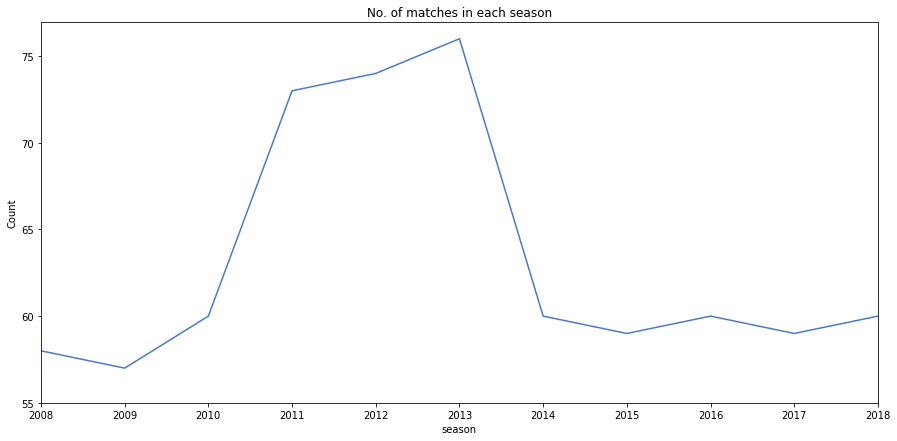

In [17]:
seasons.plot(kind='line', x='season', figsize=(15, 7), yticks=np.arange(55, 80, 5))
plt.xticks(seasons.keys())
plt.ylabel('Count')
plt.title('No. of matches in each season')

### 4. Overall matches played by each team

In [18]:
team_match_count = match['team1'].append(match['team2'], ignore_index=False)
team_match_count = team_match_count.value_counts()
team_match_count

Mumbai Indians                 171
Royal Challengers Bangalore    166
Kolkata Knight Riders          164
Kings XI Punjab                162
Delhi Daredevils               161
Chennai Super Kings            147
Rajasthan Royals               133
Sunrisers Hyderabad             93
Deccan Chargers                 75
Pune Warriors                   46
Rising Pune Supergiant          30
Gujarat Lions                   30
Kochi Tuskers Kerala            14
dtype: int64

Text(0.5, 1.0, 'Overall matches played by each team across seasons')

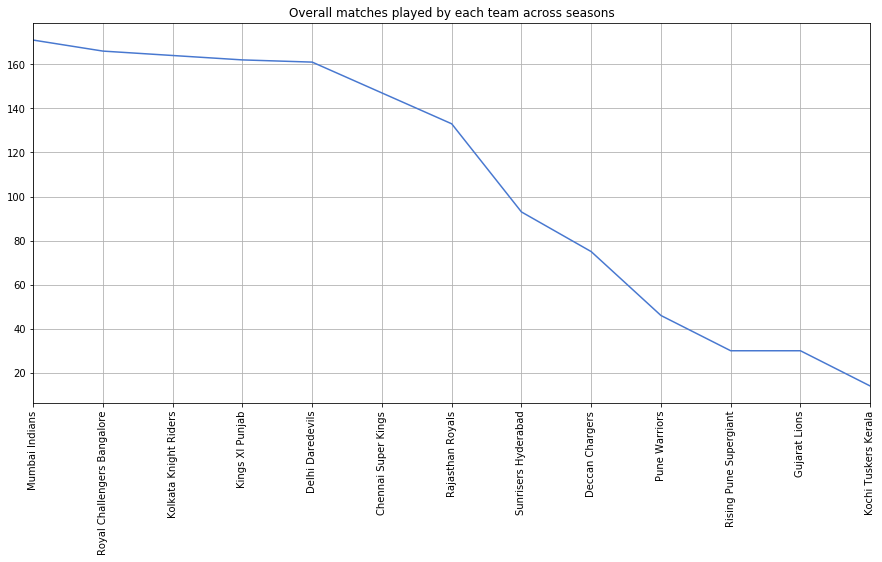

In [19]:
team_match_count.plot(kind='line', figsize=(15, 7), grid=True)
plt.xticks(range(len(team_match_count)), team_match_count.index, rotation=90)
plt.title('Overall matches played by each team across seasons')

### 5. Total number of win/loss count team-wise

In [20]:
team1 = match[['team1', 'winner']]
team2 = match[['team2', 'winner']]
team1.columns = ['team', 'winner']
team2.columns = ['team', 'winner']
team = pd.concat([team1, team2])
team.reset_index()
team.winner = np.where(team.winner == team.team, 'won', 'lost')
team.head()

,team,winner
id,,
1,Sunrisers Hyderabad,won
2,Mumbai Indians,lost
3,Gujarat Lions,lost
4,Rising Pune Supergiant,lost
5,Royal Challengers Bangalore,won


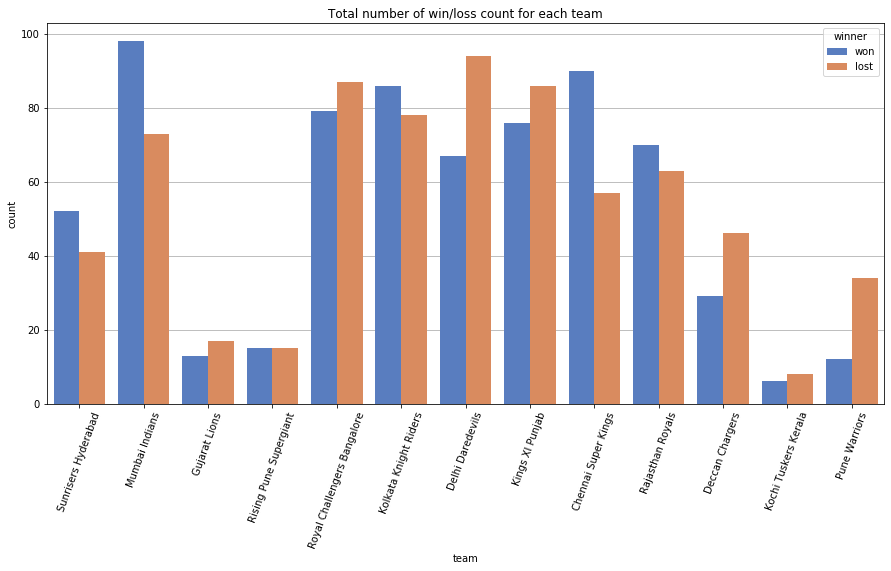

In [21]:
plt.figure(figsize=(15, 7))
plt.grid(True)
ax = sns.countplot('team', hue='winner', data=team)
plt.xticks(rotation=70)
plt.title('Total number of win/loss count for each team')
ax.set_axisbelow(True)

### 6. Winning trend by each team across all season

In [22]:
teams = match.groupby(['season','winner'])['win_by_runs'].count().reset_index()
teams.columns = ['season', 'team', 'count']
teams = teams[teams.team != 'draw']
teams.head()

,season,team,count
0,2008,Chennai Super Kings,9
1,2008,Deccan Chargers,2
2,2008,Delhi Daredevils,7
3,2008,Kings XI Punjab,10
4,2008,Kolkata Knight Riders,6


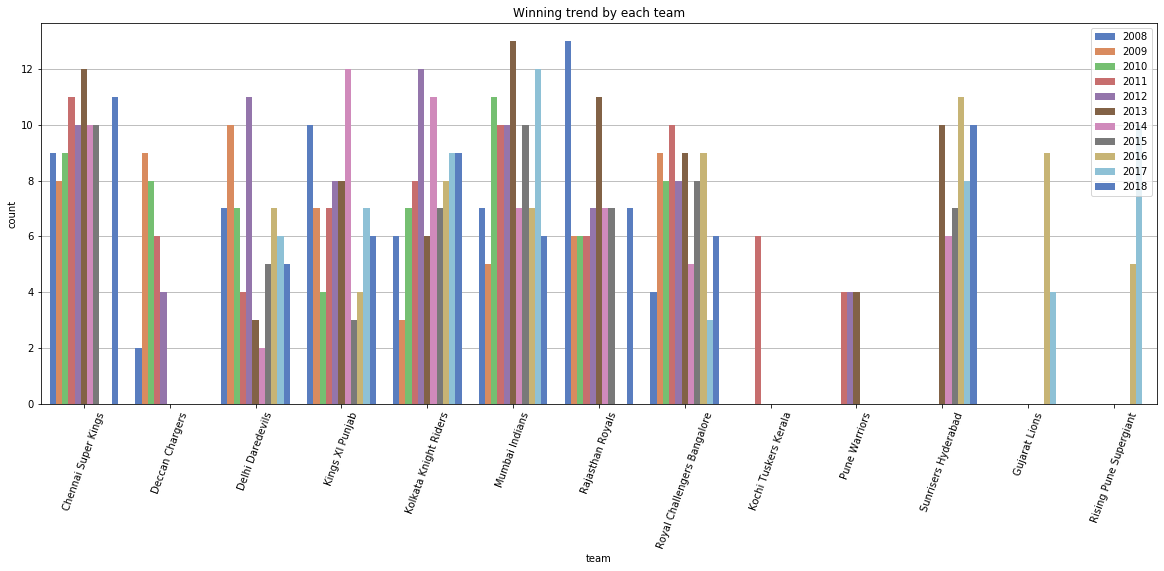

In [23]:
plt.figure(figsize=(20,7))
plt.grid(True)
ax = sns.barplot(data=teams, x='team', y ='count', hue='season', palette='muted')
plt.legend(loc='upper right')
plt.xticks(rotation=70)
plt.title('Winning trend by each team')
ax.set_axisbelow(True)

### 7. Top 10 highest run scoring teams

In [24]:
team_total = delivery.groupby(['match_id', 'inning'])['total_runs'].sum().unstack().reset_index()
team_total.columns = ['match_id', 'team1_total', 'team2_total', 'team1_super', 'team2_super']
team_total.head()

,match_id,team1_total,team2_total,team1_super,team2_super
0,1,207.0,172.0,NaN,NaN
1,2,184.0,187.0,NaN,NaN
2,3,183.0,184.0,NaN,NaN
3,4,163.0,164.0,NaN,NaN
4,5,157.0,142.0,NaN,NaN


In [25]:
team_score = pd.merge(match, team_total, left_on='id', right_on='match_id', how='outer')
team_score.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,team1_total,team2_total,team1_super,team2_super
0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207.0,172.0,NaN,NaN
1,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184.0,187.0,NaN,NaN
2,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183.0,184.0,NaN,NaN
3,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163.0,164.0,NaN,NaN
4,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157.0,142.0,NaN,NaN


In [26]:
team1 = team_score[['team1', 'team1_total']]
team1.columns = ['team', 'total']
team2 = team_score[['team2', 'team2_total']]
team2.columns = ['team', 'total']
total_by_teams = team1.append(team2).fillna(0).sort_values('total')
team_high = total_by_teams.tail(10)
team_high['total'] = team_high['total'].astype(int)
team_high.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,team,total
646,Rajasthan Royals,231
258,Delhi Daredevils,231
485,Kings XI Punjab,231
295,Kings XI Punjab,232
561,Royal Challengers Bangalore,235


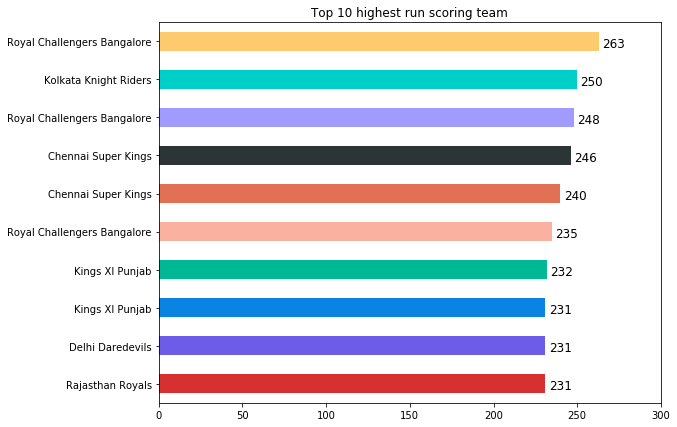

In [27]:
colors = ['#d63031', '#6c5ce7', '#0984e3', '#00b894', '#fab1a0', '#e17055', '#2d3436',  '#a29bfe', '#00cec9', '#fdcb6e']
ax = team_high.plot.barh(x='team', y='total', color=colors, figsize=(9,7), xticks=np.arange(0, 330, 50), legend=False)
scores = list( team_high['total'])
plt.ylabel('')
for index, i in enumerate(ax.patches):
    ax.text(i.get_width()+ 2, i.get_y()+0.1, scores[index], fontsize=12)
plt.title('Top 10 highest run scoring team')
ax.set_axisbelow(True)

### 8. Most successful IPL team

In [28]:
match.winner.value_counts().head()

Mumbai Indians                 98
Chennai Super Kings            90
Kolkata Knight Riders          86
Royal Challengers Bangalore    79
Kings XI Punjab                76
Name: winner, dtype: int64

Text(0.5, 1.0, 'Most successful IPL team')

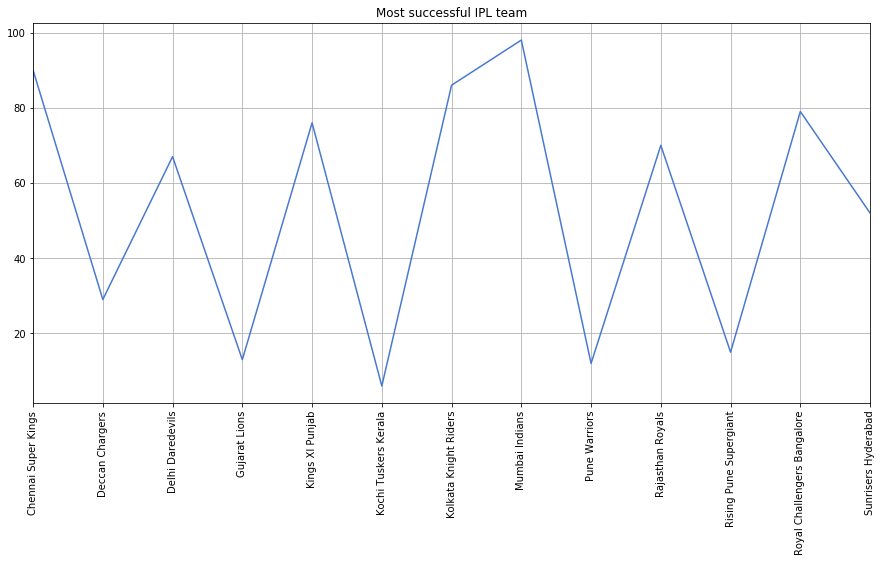

In [29]:
win_count = match[match.winner != 'draw'].winner.value_counts().sort_index()
win_count.plot(kind='line', rot=90, figsize=(15, 7), grid=True)
plt.xticks(range(len(win_count.index)), win_count.index)
plt.xlabel('')
plt.title('Most successful IPL team')

### 9. Has toss-winning helped in winning matches?

Text(0.5, 1.0, 'Toss-Win percentage')

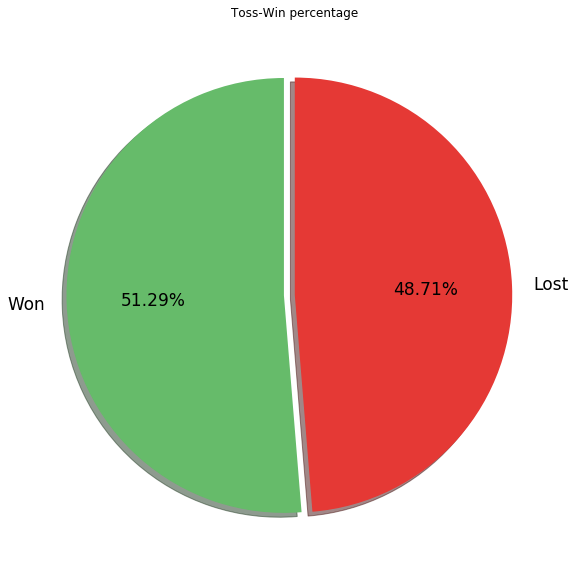

In [30]:
(match['toss_winner'] == match['winner']).value_counts().plot(kind='pie', fontsize=17, 
                                                              figsize=(10,10), labels=['Won', 'Lost'],
                                                              explode=[0.05,0.0],
                                                              shadow=True,
                                                              startangle=90, colors=['#66bb6a', '#e53935'],
                                                              autopct = "%1.2f%%")
plt.ylabel('')
plt.title('Toss-Win percentage')

### Team wise pie chart toss/win chart

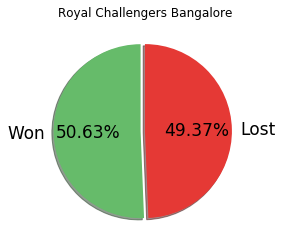

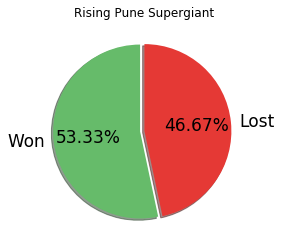

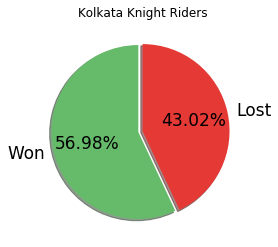

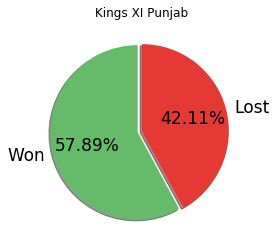

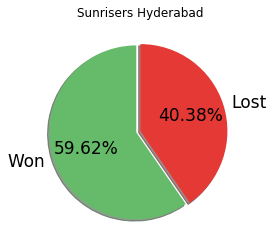

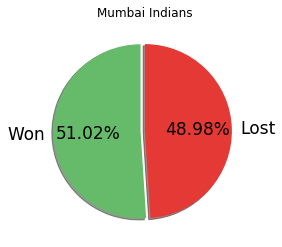

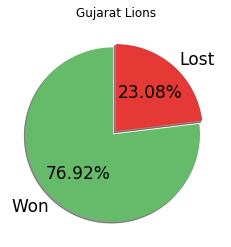

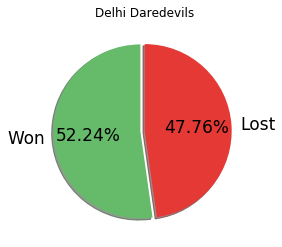

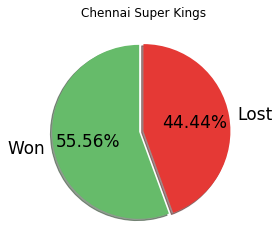

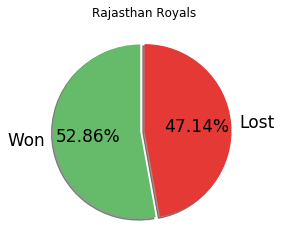

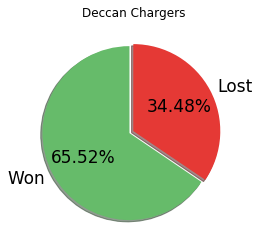

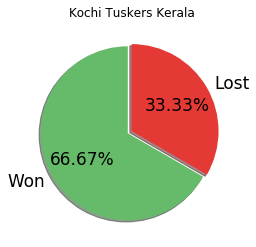

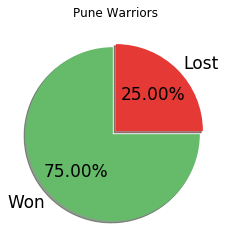

In [31]:
team_names = match.toss_winner.unique()
for team_name in team_names:
    temp_match = match[match['winner'] == team_name]
    fig = plt.figure(figsize=(4,4))
    (temp_match['toss_winner'] == temp_match['winner']).value_counts().plot(kind='pie', fontsize=17, 
                                                              figsize=(4,4), labels=['Won', 'Lost'],
                                                              explode=[0.05,0.0],
                                                              shadow=True,
                                                              startangle=90, colors=['#66bb6a', '#e53935'],
                                                              autopct = "%1.2f%%")
    plt.title(team_name)
    plt.ylabel('')
    #fig.savefig('./ratio/' + team_name + '.png', transparent=True)

### 10. Team(s) won by maximum/minimum runs

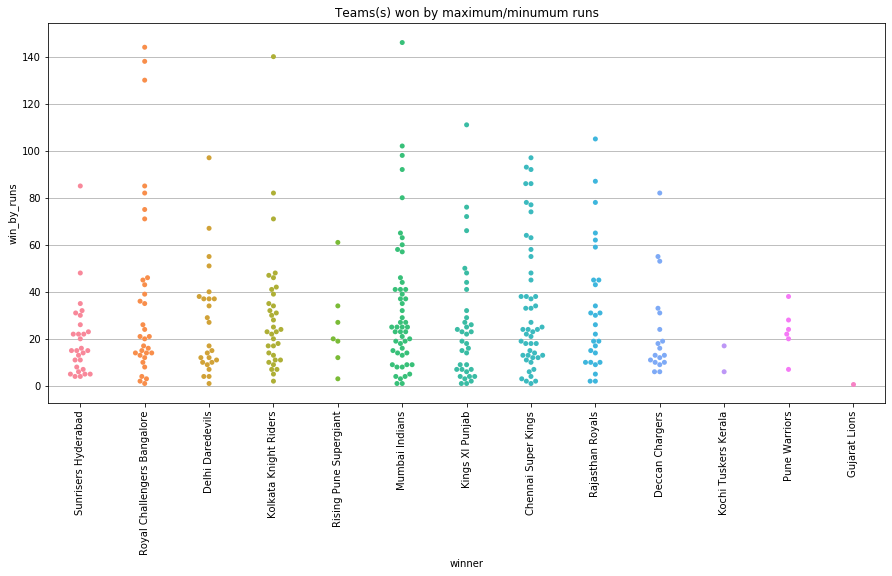

In [32]:
plt.figure(figsize=(15, 7))
plt.grid()
ax = sns.swarmplot(data=match[match['win_by_runs'] > 0], x='winner', y='win_by_runs')
plt.xticks(rotation=90)
plt.title('Teams(s) won by maximum/minumum runs')
ax.set_axisbelow(True)

### 11. Team(s) won by maximum/minimum wickets

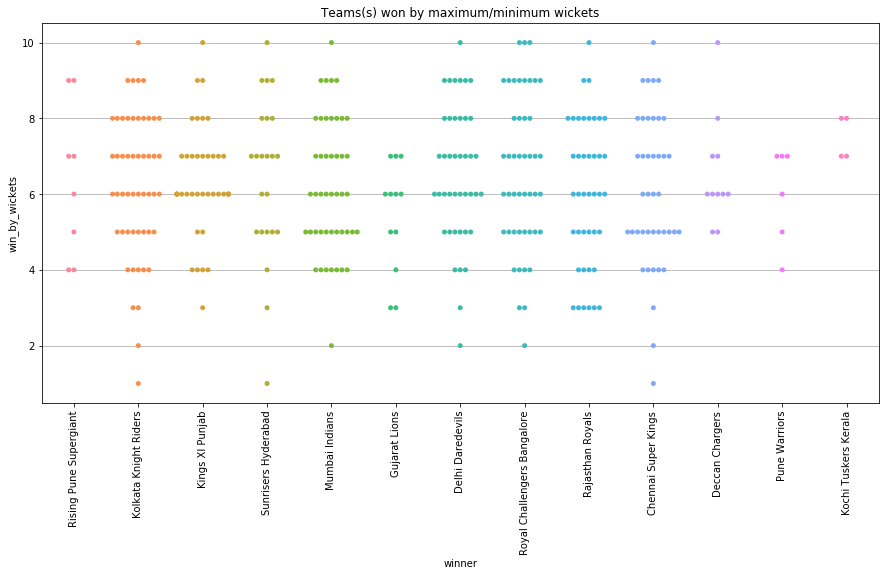

In [33]:
plt.figure(figsize=(15, 7))
plt.grid(True)
ax = sns.swarmplot(data=match[match['win_by_wickets'] > 0], x='winner', y='win_by_wickets')
plt.xticks(rotation=90)
plt.title('Teams(s) won by maximum/minimum wickets')
ax.set_axisbelow(True)

### 12. Over-wise average runs (excluding extras)

In [34]:
innings_over = delivery.groupby(['match_id', 'inning', 'over'])['batsman_runs'].sum().reset_index()
over_runs = innings_over[['over', 'batsman_runs']]
avg_runs_over = over_runs.groupby('over')['batsman_runs'].mean().reset_index()
avg_runs_over.head()

,over,batsman_runs
0,1,5.509972
1,2,6.649640
2,3,7.426206
3,4,7.716343
4,5,7.783297


Text(0.5, 1.0, 'Over-wise average runs (excluding extra)')

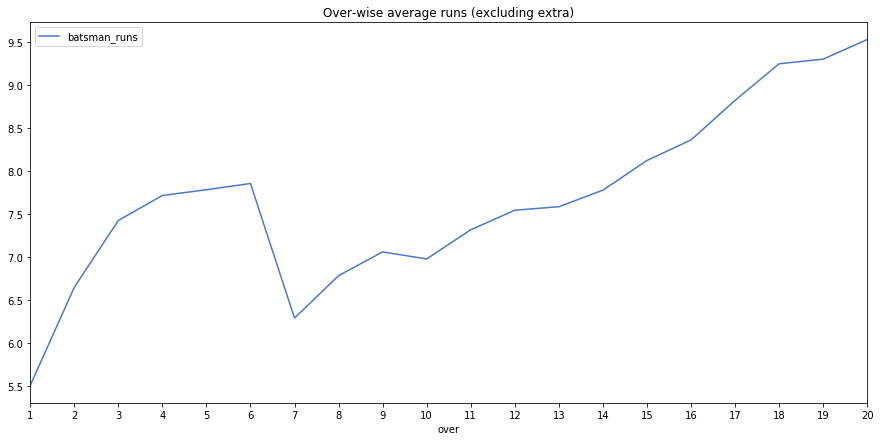

In [35]:
avg_runs_over.plot(kind='line', x='over', y='batsman_runs', figsize=(15, 7))
plt.xticks(range(1,21,1))
plt.title('Over-wise average runs (excluding extra)')

### 13. Top 10 players with most Man of the match

In [36]:
top10 = match.player_of_match.value_counts().sort_values(ascending=False).head(10)
top10

CH Gayle          20
AB de Villiers    18
RG Sharma         16
YK Pathan         16
DA Warner         15
MS Dhoni          14
SK Raina          14
G Gambhir         13
SR Watson         13
AM Rahane         12
Name: player_of_match, dtype: int64

Text(0.5, 1.0, 'Top 10 players with most man of the match title')

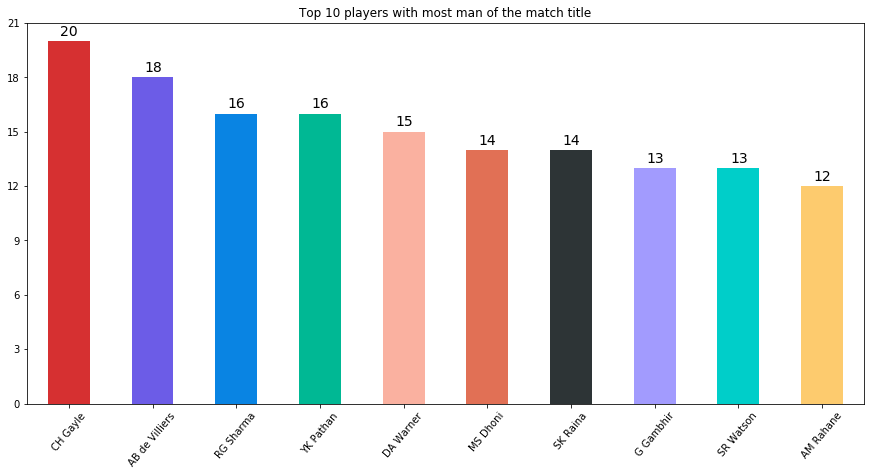

In [37]:
ax = top10.plot(kind='bar', figsize=(15,7), yticks=np.arange(0, 24, 3), rot=50, color=colors)
for index, i in enumerate(ax.patches):
    ax.text(i.get_x()+0.15, i.get_height()+0.3, top10[index], fontsize=14)
plt.title('Top 10 players with most man of the match title')

### 14. Batsman with highest scores

In [38]:
top_batsman = delivery.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
top_batsman

batsman
SK Raina          5014
V Kohli           4962
RG Sharma         4504
G Gambhir         4223
RV Uthappa        4144
S Dhawan          4090
MS Dhoni          4041
CH Gayle          4037
DA Warner         4014
AB de Villiers    3974
Name: batsman_runs, dtype: int64

Text(0.5, 1.0, 'Batsman with highest score')

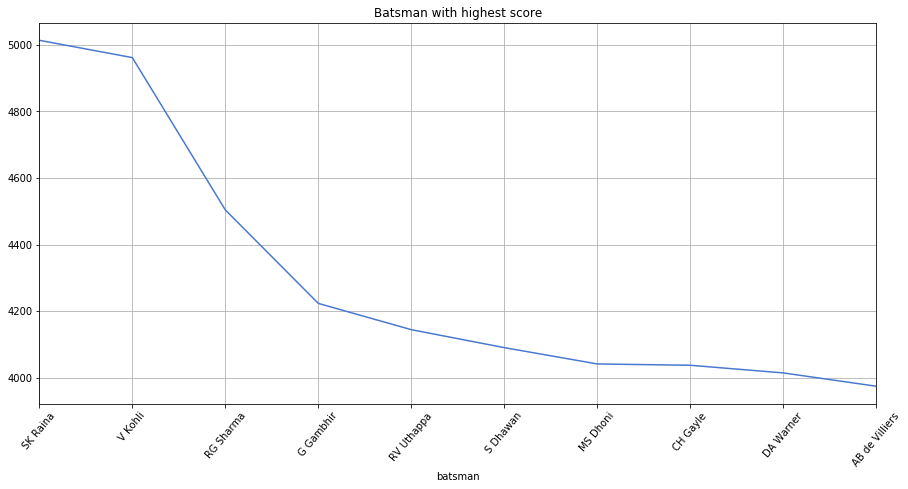

In [39]:
top_batsman.plot(kind='line', x='batsman', rot=90, figsize=(15, 7), grid=True)
plt.xticks(range(len(top_batsman)), top_batsman.keys().tolist(), rotation = 50)
plt.title('Batsman with highest score')

### 15. Bowlers with the highest number of wickets

In [40]:
delivery.dismissal_kind.unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [41]:
top_bowlers = delivery[delivery.dismissal_kind.isin(['caught', 'bowled', 'run out', 'lbw', 'caught and bowled','stumped'])].groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10)
top_bowlers

bowler
SL Malinga         170
A Mishra           155
DJ Bravo           155
PP Chawla          146
Harbhajan Singh    142
UT Yadav           127
R Vinay Kumar      127
B Kumar            127
SP Narine          126
R Ashwin           121
Name: player_dismissed, dtype: int64

Text(0.5, 1.0, 'Bowler with highest wickets')

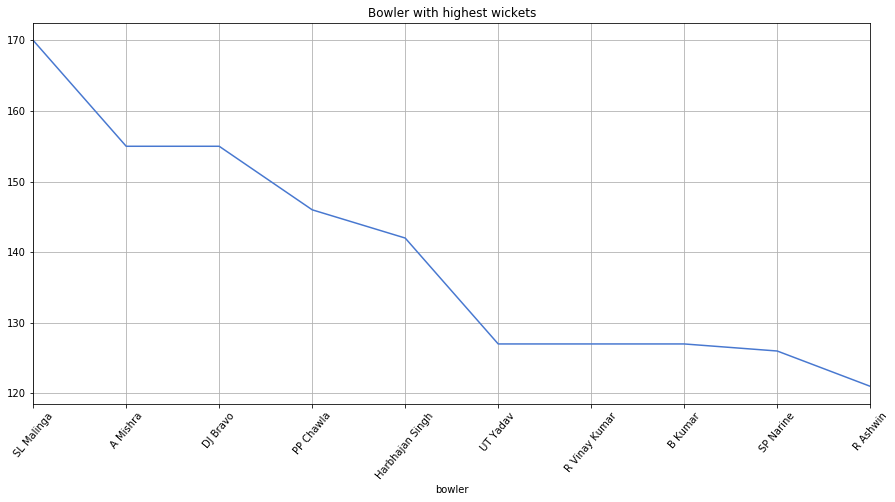

In [42]:
top_bowlers.plot(kind='line', x='batsman', rot=90, figsize=(15, 7), grid=True)
plt.xticks(range(len(top_bowlers)), top_bowlers.keys().tolist(), rotation = 50)
plt.title('Bowler with highest wickets')

### 16. Most dismissals by a wicket keeper

We can get the list of wicket keepers name by finding the fielder name and filtering the overall fielders name with that list to find the overall dismissals by wicket keepers

In [43]:
wicket_keepers = delivery[delivery['dismissal_kind'] == 'stumped'].fielder.dropna().unique().tolist()
wicket_keepers

['RR Pant',
 'MS Dhoni',
 'RV Uthappa',
 'WP Saha',
 'KM Jadhav',
 'PA Patel',
 'Vishnu Vinod',
 'MV Boucher',
 'Kamran Akmal',
 'SP Goswami',
 'YV Takawale',
 'AC Gilchrist',
 'KD Karthik',
 'PR Shah',
 'M Rawat',
 'NV Ojha',
 'KC Sangakkara',
 'AP Tare',
 'AT Rayudu',
 'AB de Villiers',
 'DJ Jacobs',
 'MS Bisla',
 'DH Yagnik',
 'KH Devdhar',
 'N Saini',
 'BB McCullum',
 'KB Arun Karthik',
 'Q de Kock',
 'Gurkeerat Singh',
 'CM Gautam',
 'SV Samson',
 'KL Rahul',
 'Ishan Kishan',
 'H Klaasen']

In [44]:
top_wk = delivery[delivery.fielder.isin(wicket_keepers)].groupby('fielder')['dismissal_kind'].count().sort_values(ascending=False).head(10)
top_wk

fielder
KD Karthik        145
MS Dhoni          142
RV Uthappa        120
AB de Villiers    108
PA Patel           88
NV Ojha            82
WP Saha            78
AC Gilchrist       75
AT Rayudu          58
KC Sangakkara      58
Name: dismissal_kind, dtype: int64

Text(0.5, 1.0, 'Most valuable wicket keepers')

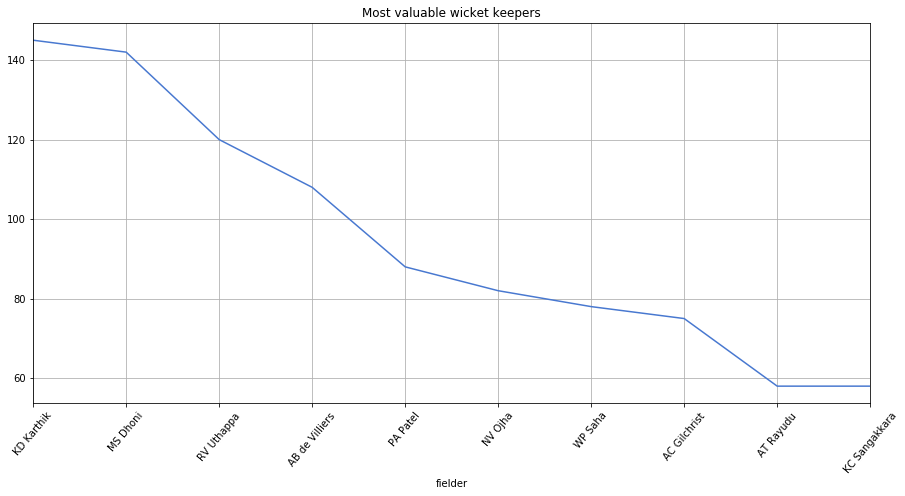

In [45]:
top_wk.plot(kind='line', x='batsman', rot=90, figsize=(15, 7), grid=True)
plt.xticks(range(len(top_wk)), top_wk.keys().tolist(), rotation = 50)
plt.title('Most valuable wicket keepers')

### 17. Distribution of runs

In [46]:
team_total = delivery.groupby(['match_id', 'inning'])['total_runs'].sum().unstack().reset_index()
innings = team_total[1].append(team_total[2])
innings.fillna(0, inplace=True)
innings.head()

0    207.0
1    184.0
2    183.0
3    163.0
4    157.0
dtype: float64

Text(0.5, 1.0, 'Distribution ratio of runs against matches')

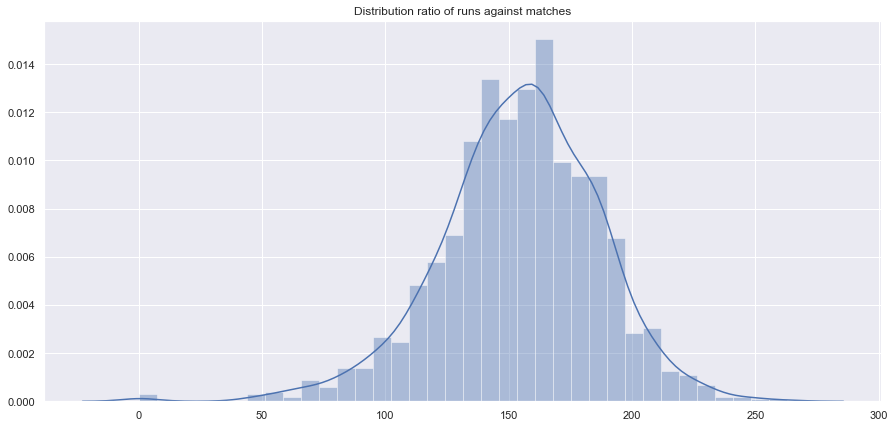

In [47]:
sns.set()
plt.figure(figsize=(15, 7))
sns.distplot(innings)
plt.title('Distribution ratio of runs against matches')

### 18. Distribution of wickets

In [48]:
# innings_wicket = delivery.groupby(['match_id', 'inning'])['player_dismissed']
wicket_total = delivery[delivery.player_dismissed.notna()].groupby(['match_id', 'inning'])['player_dismissed'].count().unstack().reset_index()
wickets = wicket_total[1].append(wicket_total[2])
wickets.fillna(0, inplace=True)
wickets.head()

0    4.0
1    8.0
2    4.0
3    6.0
4    8.0
dtype: float64

Text(0.5, 1.0, 'Distribution of wickets against matches')

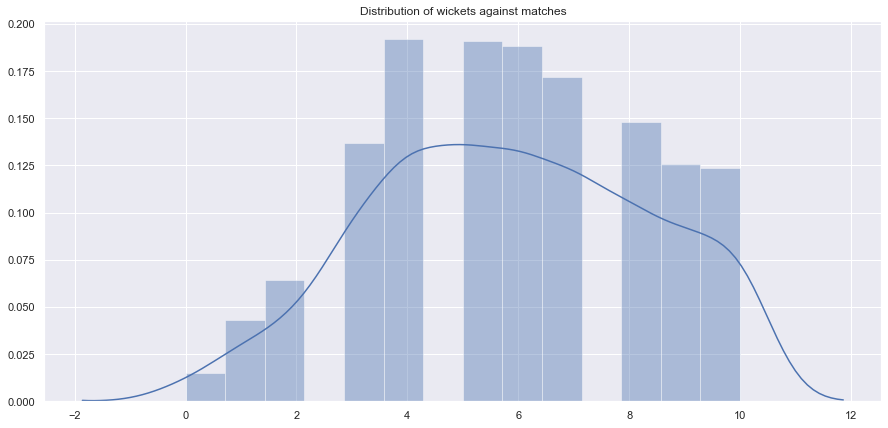

In [49]:
plt.figure(figsize=(15, 7))
sns.distplot(wickets)
plt.title('Distribution of wickets against matches')

Text(0.5, 1.0, 'No. of matches with wickets')

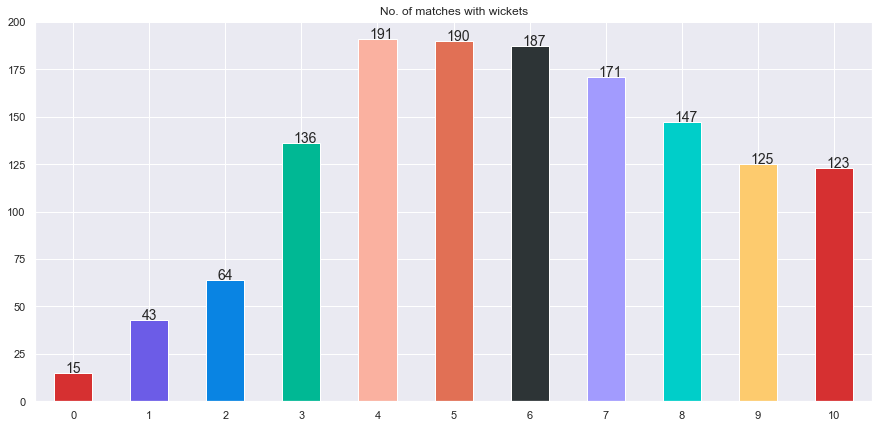

In [50]:
wickets_df = wickets.astype(int).value_counts().sort_index()
ax = wickets_df.plot(kind='bar', figsize=(15, 7), rot=0, color=colors)
for index, i in enumerate(ax.patches):
    ax.text(i.get_x()+0.15, i.get_height()+0.3, wickets_df[index], fontsize=14)
plt.title('No. of matches with wickets')

## Conclusion

**1. Number of seasons in the dataset**

There are 11 seasons in the given dataset.

**2 - Total no. of matches in the dataset**

Total of 696 match data has been provided in the dataset.

**3 - Number of matches in each season**

On an average, there are 63 matches per season and 2013 has the highest number of matches with 76 matches.

**4 - Overall matches played by each team**

Mumbai Indian have played the most number of matches with 171.

**5 - Total number of win/loss count team wise**

Mumbai Indian has the highest number of win count but Chennai Super kings has the highest win-loss ratio.

**6 - Winning trend by each team across all season**

The chart displays the winning count of each team across all seasons. Mumbai Indians and Rajasthan Royals has the top most win count for a season of 13 matches.

**7 - Top 10 highest run scoring teams**

Royal Challengers Bangalore has the highest score in all seasons with a score of 263.

**8 - Most successful IPL team**

Mumbai Indians has been the most successful team with overall 98 wins.

**9 - Has toss-winning helped in winning matches?**

There's a 51% chance for the team who wins the toss to win the match. But when comparing with team wise record, Gujarat Lions has 83% chance of winning the match and Royal Challengers with 50-50% as least.

**10 - Team(s) won by maximum/minimum runs**

*Maximum runs margin* - Mumbai Indian

*Minimum runs margin* - Royal Challengers Bangalore, Delhi Daredevils, Mumbai Indians, Kings XI Punjab, Chennai Super Kings, Gujarat Lions

**11 - Team(s) won by maximum/minimum wickets**

*Teams won with no wicket loss* - Kolkata Knight Riders, Kings XI Punjab, Sunrisers Hyderabad, Mumbai Indians, Delhi Daredevils, Royal Challengers Bangalore, Rajasthan Royals, Chennai Super Kings, Deccan Chargers

*Teams won with the last wicket in hand* - Kolkata Knight Riders, Sunrisers Hyderabad, Chennai Super Kings

**12 - Over-wise average runs (excluding extras)**

Opening batsman has a good runrate of 8 till 6th over and the players starts playing defensive with a runrate lower to 6 and gradually increases to a highest value of 9.5 at the end of the match.

**13 - Top 10 players with most Man of the match**

Chris Gayle has the most number of Man of the match title with the count of 20.

**14 - Batsman with highest scores**

Suresh Raina is the highest batsman in the overall seasons.

**15 - Bowlers with the highest number of wickets**

Lasith Malinga tops the chart with 170 overall wickets.

**16 - Most dismissals by a wicket keeper**

Dinesh Karthik has the most dismissals of 145 wickets in overall IPL career.

**17 - Distribution of runs**

From the chart, we can understand that the most of the matches lies between 120 and 180 runs

**18 - Distribution of wickets**

Most of the matches has been ended with 4-6 loss of wickets